In [1]:
from thermo.chemical import Chemical
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import IterativeSVD
import statsmodels.formula.api as sm
import statsmodels.api as sma

matplotlib.style.use('ggplot')

import csv

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
comps = open('compounds.txt','r')

f =  open('features_dl.csv', 'w')
w = csv.writer(f)
w.writerow(['Name','MF', 'MW','CPG','CPL','TB','TMelt','TT','TC','PC','VC','RHOC','PSAT','HVAP','HFUS', 'HF', 'Vm', 'Visc'])

for comp in comps:
    try:
        name = comp.strip('\n')
        name = name.strip('\t')
        c = Chemical(name)
        data = [name,c.formula,c.MW,c.Cpg,c.Cpl,c.Tb, c.Tm,c.Tt,c.Tc,c.Pc,c.Vc,c.rhoc,c.Psat, c.Hvap, c.Hfus, c.Hf, c.Vm, c.mu]
        w.writerow(data)
    except Exception as e:
        pass

f.close()
comps.close()

In [5]:
ft = pd.read_csv('features_dl.csv')
ft.head(10)

,Name,MF,MW,CPG,CPL,TB,TMelt,TT,TC,PC,VC,RHOC,PSAT,HVAP,HFUS,HF,Vm,Visc
0,"1,3-Cyclopentadiene",C5H6,66.10114,1140.819957,1802.292349,314.15,182.05,182.05,500.0,4699960.0,0.000232,284.918707,59226.323229,405076.739586,NaN,130800.0,0.000085,0.000253
1,Cyclopentene,C5H8,68.11702,1194.705857,1960.689484,317.35,138.15,138.13,506.5,4800000.0,0.000245,278.028653,50440.182509,408584.752841,49326.878950,32930.0,0.000089,0.000332
2,"2-Methyl-1,3-butadiene",C5H8,68.11702,1508.531750,1960.689484,307.15,127.15,127.15,483.3,3739997.0,0.000266,256.079023,73379.808091,361991.935213,72375.450365,75750.0,0.000097,0.000251
3,"1,4-Pentadiene",C5H8,68.11702,1443.650821,1960.689484,299.05,125.15,125.15,478.0,3789555.0,0.000276,246.800797,97975.483765,360428.662730,89845.386660,106380.0,0.000104,0.000195
4,1-Pentyne,C5H8,68.11702,1507.232005,1960.689484,313.05,167.15,167.15,493.4,4053000.0,0.000278,245.025252,58084.265066,413392.656845,NaN,144350.0,0.000103,0.000353
5,Cyclopentane,C5H10,70.13290,1183.596267,2085.071702,322.35,179.15,179.70,511.7,4510000.0,0.000259,270.783398,42319.067142,404672.441280,8697.772372,-77240.0,0.000095,0.000415
6,2-Methyl-2-butene,C5H10,70.13290,1497.059793,2085.071702,311.65,139.15,139.42,470.0,3420000.0,0.000299,234.558194,62147.076804,388900.424471,108365.688571,-42550.0,0.000107,0.000206
7,3-Methyl-1-butene,C5H10,70.13290,1632.299430,2085.071702,293.25,104.90,104.72,452.7,3530000.0,0.000305,230.019351,120187.537332,339283.484960,76426.327729,-28950.0,0.023570,0.000007
8,1-Pentene,C5H10,70.13290,1542.189146,2215.479533,303.15,108.15,108.15,464.8,3560000.0,0.000298,235.029826,84980.631649,361893.854967,84696.340804,-20920.0,0.000110,0.000213
9,2-Pentene,C5H10,70.13290,1408.641678,2085.071702,310.05,127.55,121.80,475.0,3690000.0,0.000301,232.999668,65970.039962,369640.183678,101378.953387,-28070.0,0.000108,0.000216


### McAuliffe solubility at 298K inserted manually from IUPAC data

In [8]:
sol = pd.read_csv('sol.csv')
sol.head()

,Name,SOL
0,"1,3-Cyclopentadiene",0.0103
1,Cyclopentene,0.0535
2,"2-Methyl-1,3-butadiene",0.0642
3,"1,4-Pentadiene",0.0558
4,1-Pentyne,0.1570


### Join databases

In [9]:
df = pd.concat([ft.set_index('Name'),sol.set_index('Name')], axis=1, join='inner').reset_index()
df.head()

,Name,MF,MW,CPG,CPL,TB,TMelt,TT,TC,PC,VC,RHOC,PSAT,HVAP,HFUS,HF,Vm,Visc,SOL
0,"1,3-Cyclopentadiene",C5H6,66.10114,1140.819957,1802.292349,314.15,182.05,182.05,500.0,4699960.0,0.000232,284.918707,59226.323229,405076.739586,NaN,130800.0,0.000085,0.000253,0.0103
1,Cyclopentene,C5H8,68.11702,1194.705857,1960.689484,317.35,138.15,138.13,506.5,4800000.0,0.000245,278.028653,50440.182509,408584.752841,49326.878950,32930.0,0.000089,0.000332,0.0535
2,"2-Methyl-1,3-butadiene",C5H8,68.11702,1508.531750,1960.689484,307.15,127.15,127.15,483.3,3739997.0,0.000266,256.079023,73379.808091,361991.935213,72375.450365,75750.0,0.000097,0.000251,0.0642
3,"1,4-Pentadiene",C5H8,68.11702,1443.650821,1960.689484,299.05,125.15,125.15,478.0,3789555.0,0.000276,246.800797,97975.483765,360428.662730,89845.386660,106380.0,0.000104,0.000195,0.0558
4,1-Pentyne,C5H8,68.11702,1507.232005,1960.689484,313.05,167.15,167.15,493.4,4053000.0,0.000278,245.025252,58084.265066,413392.656845,NaN,144350.0,0.000103,0.000353,0.1570


## Imputation of missing values

### We will be using iterative SVD for imputation. This is shown to work well for matrix computation (show some proof in ppt)

In [10]:
df_numeric = df.select_dtypes(include=[np.float]).as_matrix()
df_filled = pd.DataFrame(IterativeSVD().complete(df_numeric))
names = ['MW','CPG','CPL','TB','TMelt','TT','TC','PC','VC','RHOC','PSAT','HVAP','HFUS', 'HF', 'Vm', 'Visc']

for i in range(len(names)):    df[names[i]]=df_filled[i]

[IterativeSVD] Iter 1: observed MAE=16436.427256
[IterativeSVD] Iter 2: observed MAE=10700.613090
[IterativeSVD] Iter 3: observed MAE=1040.697022
[IterativeSVD] Iter 4: observed MAE=12.631030


In [11]:
df = df[df.SOL >= 0]
df.head(10)

,Name,MF,MW,CPG,CPL,TB,TMelt,TT,TC,PC,VC,RHOC,PSAT,HVAP,HFUS,HF,Vm,Visc,SOL
0,"1,3-Cyclopentadiene",C5H6,66.10114,1140.819957,1802.292349,314.15,182.05,182.05,500.0,4699960.0,0.000232,284.918707,59226.323229,405076.739586,59596.026999,130800.0,0.000085,0.000253,0.0103
1,Cyclopentene,C5H8,68.11702,1194.705857,1960.689484,317.35,138.15,138.13,506.5,4800000.0,0.000245,278.028653,50440.182509,408584.752841,49326.878950,32930.0,0.000089,0.000332,0.0535
2,"2-Methyl-1,3-butadiene",C5H8,68.11702,1508.531750,1960.689484,307.15,127.15,127.15,483.3,3739997.0,0.000266,256.079023,73379.808091,361991.935213,72375.450365,75750.0,0.000097,0.000251,0.0642
3,"1,4-Pentadiene",C5H8,68.11702,1443.650821,1960.689484,299.05,125.15,125.15,478.0,3789555.0,0.000276,246.800797,97975.483765,360428.662730,89845.386660,106380.0,0.000104,0.000195,0.0558
4,1-Pentyne,C5H8,68.11702,1507.232005,1960.689484,313.05,167.15,167.15,493.4,4053000.0,0.000278,245.025252,58084.265066,413392.656845,55025.113638,144350.0,0.000103,0.000353,0.1570
5,Cyclopentane,C5H10,70.13290,1183.596267,2085.071702,322.35,179.15,179.70,511.7,4510000.0,0.000259,270.783398,42319.067142,404672.441280,8697.772372,-77240.0,0.000095,0.000415,0.0156
6,2-Methyl-2-butene,C5H10,70.13290,1497.059793,2085.071702,311.65,139.15,139.42,470.0,3420000.0,0.000299,234.558194,62147.076804,388900.424471,108365.688571,-42550.0,0.000107,0.000206,0.0435
7,3-Methyl-1-butene,C5H10,70.13290,1632.299430,2085.071702,293.25,104.90,104.72,452.7,3530000.0,0.000305,230.019351,120187.537332,339283.484960,76426.327729,-28950.0,0.023570,0.000007,0.0130
8,1-Pentene,C5H10,70.13290,1542.189146,2215.479533,303.15,108.15,108.15,464.8,3560000.0,0.000298,235.029826,84980.631649,361893.854967,84696.340804,-20920.0,0.000110,0.000213,0.0148
9,2-Pentene,C5H10,70.13290,1408.641678,2085.071702,310.05,127.55,121.80,475.0,3690000.0,0.000301,232.999668,65970.039962,369640.183678,101378.953387,-28070.0,0.000108,0.000216,0.0203


# Baseline Performance: Linear Regression :

In [9]:
result = sm.ols(formula="SOL ~ MW + CPG + CPL + TB + TMelt + TT + TC + PC + VC + RHOC + PSAT + HVAP + HFUS + HF + Vm + Visc", data=df).fit()
result.summary()
#print(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SOL   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     4.051
Date:                Thu, 02 Nov 2017   Prob (F-statistic):           2.71e-06
Time:                        06:47:31   Log-Likelihood:                 402.49
No. Observations:                 155   AIC:                            -771.0
Df Residuals:                     138   BIC:                            -719.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1132      0.032      3.588      0.000       0.051       0.176
MW            -0.0003   7.99e-05     -3.849      0.000      -0.000      -0.000
CPG        -2.041e-05    1.6e-05     -1.280      0.203    -5.2e-05    1.11e-05
CPL        -6.709e-06   1.01e-05     -0.667      0.506   -2.66e-05    1.32e-05
TB          1.856e-05    2.9e-05      0.640      0.523   -3.87e-05    7.59e-05
TMelt          0.0002      0.000      0.417      0.677      -0.001       0.001
TT            -0.0002      0.000     -0.456      0.649      -0.001       0.001
TC          1.415e-05   2.18e-05      0.650      0.517   -2.89e-05    5.72e-05
PC          3.026e-09   4.91e-09      0.616      0.539   -6.69e-09    1.27e-08
VC            52.3788     17.509      2.992      0.003      17.759      86.999
RHOC          -0.0002   8.37e-05     -2.416      0.017      -0.000   -3.67e-05
PSAT        2.243e-07   1.09e-07      2.055      0.042    8.51e-09     4.4e-07
HVAP       -4.089e-08   3.12e-08     -1.309      0.193   -1.03e-07    2.09e-08
HFUS         5.16e-10    4.8e-08      0.011      0.991   -9.43e-08    9.54e-08
HF           3.47e-08   1.71e-08      2.023      0.045    7.92e-10    6.86e-08
Vm            -1.5877      0.812     -1.955      0.053      -3.194       0.018
Visc          -2.5083      3.933     -0.638      0.525     -10.286       5.269
==============================================================================
Omnibus:                      151.448   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2834.611
Skew:                           3.560   Prob(JB):                         0.00
Kurtosis:                      22.703   Cond. No.                     3.26e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

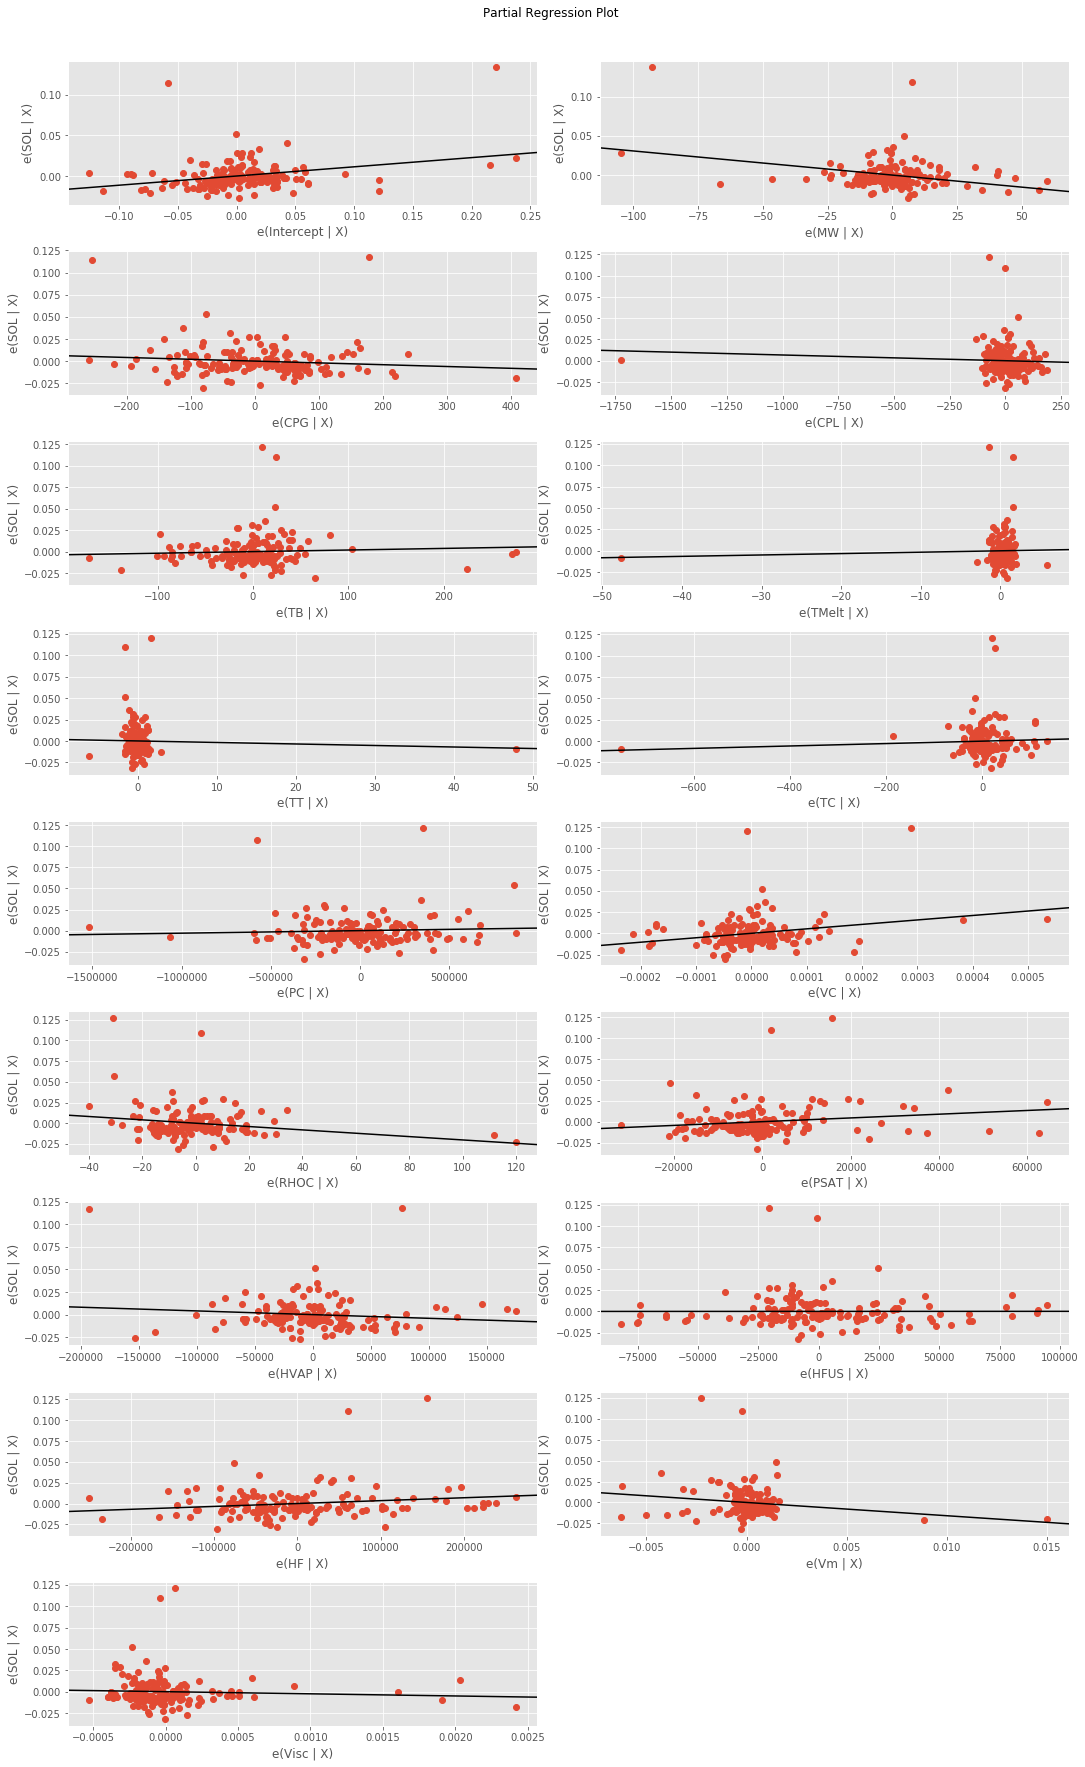

In [10]:
fig = plt.figure(figsize=(15,25))
fig = sma.graphics.plot_partregress_grid(result, fig=fig)
plt.show()

### Looks like the linear regression model is not very effective. Let us try to build a ANN. 

In [16]:
df.head()

,Name,MF,MW,CPG,CPL,TB,TMelt,TT,TC,PC,VC,RHOC,PSAT,HVAP,HFUS,HF,Vm,Visc,SOL
0,"1,3-Cyclopentadiene",C5H6,66.10114,1140.819957,1802.292349,314.15,182.05,182.05,500.0,4699960.0,0.000232,284.918707,59226.323229,405076.739586,59596.026999,130800.0,0.000085,0.000253,0.0103
1,Cyclopentene,C5H8,68.11702,1194.705857,1960.689484,317.35,138.15,138.13,506.5,4800000.0,0.000245,278.028653,50440.182509,408584.752841,49326.878950,32930.0,0.000089,0.000332,0.0535
2,"2-Methyl-1,3-butadiene",C5H8,68.11702,1508.531750,1960.689484,307.15,127.15,127.15,483.3,3739997.0,0.000266,256.079023,73379.808091,361991.935213,72375.450365,75750.0,0.000097,0.000251,0.0642
3,"1,4-Pentadiene",C5H8,68.11702,1443.650821,1960.689484,299.05,125.15,125.15,478.0,3789555.0,0.000276,246.800797,97975.483765,360428.662730,89845.386660,106380.0,0.000104,0.000195,0.0558
4,1-Pentyne,C5H8,68.11702,1507.232005,1960.689484,313.05,167.15,167.15,493.4,4053000.0,0.000278,245.025252,58084.265066,413392.656845,55025.113638,144350.0,0.000103,0.000353,0.1570


In [102]:
#X and Y vectors

#Taking only numerical columns

X = df.iloc[:, 2:18].values
y = df.iloc[:, 18].values

In [129]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
sc = StandardScaler()
rb = RobustScaler()



#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
X = sc.fit_transform(X)
y=pd.cut(y, 500, labels=False)

#Dataset is skewed, need to fix class weight.
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced', np.unique(y), y)

In [130]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [159]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=16, kernel_initializer='normal', activation='tanh'))
    #model.add(Dropout(0.2))
    model.add(Dense(5, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='RMSProp' , metrics=['accuracy'])
    #model.compile(loss='mean_squared_error', optimizer='RMSProp')

    return model

In [160]:
model = baseline_model()
seed = 7
np.random.seed(seed)

from keras.utils.np_utils import to_categorical

history = model.fit(X, y, validation_split=0.1, epochs=1500, batch_size=5, verbose=1,class_weight=class_weight)
                    #,callbacks=[EarlyStopping(monitor='val_loss', patience=0)])

Train on 139 samples, validate on 16 samples
Epoch 1/1500
139/139 [==============================] - 1s - loss: 5784.3739 - acc: 0.3094 - val_loss: 6.4672e-04 - val_acc: 1.0000
Epoch 2/1500
139/139 [==============================] - 0s - loss: 5781.1786 - acc: 0.3094 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 3/1500
139/139 [==============================] - 0s - loss: 5777.3053 - acc: 0.3094 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 4/1500
139/139 [==============================] - 0s - loss: 5772.2379 - acc: 0.3094 - val_loss: 0.0097 - val_acc: 1.0000
Epoch 5/1500
139/139 [==============================] - 0s - loss: 5765.4738 - acc: 0.3094 - val_loss: 0.0166 - val_acc: 1.0000
Epoch 6/1500
139/139 [==============================] - 0s - loss: 5757.2794 - acc: 0.3165 - val_loss: 0.0280 - val_acc: 1.0000
Epoch 7/1500
139/139 [==============================] - 0s - loss: 5748.0987 - acc: 0.2806 - val_loss: 0.0462 - val_acc: 0.9375
Epoch 8/1500
139/139 [==============================] -

139/139 [==============================] - 0s - loss: 3705.5532 - acc: 0.0647 - val_loss: 254.0255 - val_acc: 0.6250
Epoch 124/1500
139/139 [==============================] - 0s - loss: 3693.3275 - acc: 0.0791 - val_loss: 257.9493 - val_acc: 0.6250
Epoch 125/1500
139/139 [==============================] - 0s - loss: 3679.9791 - acc: 0.0647 - val_loss: 262.2710 - val_acc: 0.6250
Epoch 126/1500
139/139 [==============================] - 0s - loss: 3666.1042 - acc: 0.0719 - val_loss: 264.8329 - val_acc: 0.6250
Epoch 127/1500
139/139 [==============================] - 0s - loss: 3660.0206 - acc: 0.0647 - val_loss: 265.6925 - val_acc: 0.7500
Epoch 128/1500
139/139 [==============================] - 0s - loss: 3644.6833 - acc: 0.0719 - val_loss: 267.9265 - val_acc: 0.7500
Epoch 129/1500
139/139 [==============================] - 0s - loss: 3630.2871 - acc: 0.0647 - val_loss: 271.9671 - val_acc: 0.6875
Epoch 130/1500
139/139 [==============================] - 0s - loss: 3620.3618 - acc: 0.071

139/139 [==============================] - 0s - loss: 2544.7665 - acc: 0.0863 - val_loss: 0.4219 - val_acc: 0.8125
Epoch 248/1500
139/139 [==============================] - 0s - loss: 2539.5872 - acc: 0.0791 - val_loss: 0.4211 - val_acc: 0.8125
Epoch 249/1500
139/139 [==============================] - 0s - loss: 2531.4371 - acc: 0.0863 - val_loss: 0.4187 - val_acc: 0.8125
Epoch 250/1500
139/139 [==============================] - 0s - loss: 2523.9562 - acc: 0.0935 - val_loss: 0.3996 - val_acc: 0.8125
Epoch 251/1500
139/139 [==============================] - 0s - loss: 2517.8219 - acc: 0.0791 - val_loss: 0.4023 - val_acc: 0.8125
Epoch 252/1500
139/139 [==============================] - 0s - loss: 2512.2507 - acc: 0.0935 - val_loss: 0.4117 - val_acc: 0.8125
Epoch 253/1500
139/139 [==============================] - 0s - loss: 2507.6017 - acc: 0.0863 - val_loss: 0.4283 - val_acc: 0.8125
Epoch 254/1500
139/139 [==============================] - 0s - loss: 2498.5048 - acc: 0.0935 - val_loss: 

139/139 [==============================] - 0s - loss: 2008.4978 - acc: 0.1799 - val_loss: 0.6922 - val_acc: 0.8750
Epoch 374/1500
139/139 [==============================] - 0s - loss: 2004.9827 - acc: 0.1727 - val_loss: 0.6938 - val_acc: 0.8750
Epoch 375/1500
139/139 [==============================] - 0s - loss: 2000.8493 - acc: 0.1727 - val_loss: 0.6968 - val_acc: 0.8750
Epoch 376/1500
139/139 [==============================] - 0s - loss: 1998.4753 - acc: 0.1655 - val_loss: 0.6987 - val_acc: 0.8750
Epoch 377/1500
139/139 [==============================] - 0s - loss: 1993.6979 - acc: 0.1799 - val_loss: 0.7001 - val_acc: 0.8750
Epoch 378/1500
139/139 [==============================] - 0s - loss: 1991.8849 - acc: 0.1655 - val_loss: 0.7022 - val_acc: 0.8750
Epoch 379/1500
139/139 [==============================] - 0s - loss: 1985.9323 - acc: 0.1727 - val_loss: 0.7037 - val_acc: 0.8750
Epoch 380/1500
139/139 [==============================] - 0s - loss: 1982.7888 - acc: 0.1799 - val_loss: 

139/139 [==============================] - 0s - loss: 1664.7396 - acc: 0.1727 - val_loss: 0.8841 - val_acc: 0.8750
Epoch 500/1500
139/139 [==============================] - 0s - loss: 1668.4481 - acc: 0.1727 - val_loss: 0.8853 - val_acc: 0.8750
Epoch 501/1500
139/139 [==============================] - 0s - loss: 1663.3722 - acc: 0.1655 - val_loss: 0.8870 - val_acc: 0.8750
Epoch 502/1500
139/139 [==============================] - 0s - loss: 1663.2308 - acc: 0.1727 - val_loss: 0.8884 - val_acc: 0.8750
Epoch 503/1500
139/139 [==============================] - 0s - loss: 1656.9524 - acc: 0.1655 - val_loss: 0.8905 - val_acc: 0.8750
Epoch 504/1500
139/139 [==============================] - 0s - loss: 1658.7869 - acc: 0.1727 - val_loss: 0.8919 - val_acc: 0.8750
Epoch 505/1500
139/139 [==============================] - 0s - loss: 1652.9935 - acc: 0.1655 - val_loss: 0.8938 - val_acc: 0.8750
Epoch 506/1500
139/139 [==============================] - 0s - loss: 1651.1600 - acc: 0.1799 - val_loss: 

139/139 [==============================] - 0s - loss: 1313.3018 - acc: 0.1655 - val_loss: 1.0967 - val_acc: 0.8750
Epoch 625/1500
139/139 [==============================] - 0s - loss: 1311.6430 - acc: 0.1727 - val_loss: 1.0987 - val_acc: 0.8750
Epoch 626/1500
139/139 [==============================] - 0s - loss: 1308.7552 - acc: 0.1727 - val_loss: 1.1002 - val_acc: 0.8750
Epoch 627/1500
139/139 [==============================] - 0s - loss: 1303.9975 - acc: 0.1583 - val_loss: 1.1020 - val_acc: 0.8750
Epoch 628/1500
139/139 [==============================] - 0s - loss: 1305.4899 - acc: 0.1727 - val_loss: 1.1038 - val_acc: 0.8750
Epoch 629/1500
139/139 [==============================] - 0s - loss: 1296.8710 - acc: 0.1655 - val_loss: 1.1064 - val_acc: 0.8750
Epoch 630/1500
139/139 [==============================] - 0s - loss: 1299.1494 - acc: 0.1799 - val_loss: 1.1080 - val_acc: 0.8750
Epoch 631/1500
139/139 [==============================] - 0s - loss: 1290.3319 - acc: 0.1655 - val_loss: 

139/139 [==============================] - 0s - loss: 959.0611 - acc: 0.1871 - val_loss: 1.4418 - val_acc: 0.8750
Epoch 751/1500
139/139 [==============================] - 0s - loss: 951.3854 - acc: 0.1942 - val_loss: 1.4443 - val_acc: 0.8750
Epoch 752/1500
139/139 [==============================] - 0s - loss: 945.6556 - acc: 0.1871 - val_loss: 1.4469 - val_acc: 0.8750
Epoch 753/1500
139/139 [==============================] - 0s - loss: 948.1096 - acc: 0.1942 - val_loss: 1.4520 - val_acc: 0.8750
Epoch 754/1500
139/139 [==============================] - 0s - loss: 948.5593 - acc: 0.1942 - val_loss: 1.4556 - val_acc: 0.8750
Epoch 755/1500
139/139 [==============================] - 0s - loss: 941.0388 - acc: 0.1871 - val_loss: 1.4588 - val_acc: 0.8750
Epoch 756/1500
139/139 [==============================] - 0s - loss: 937.4235 - acc: 0.2086 - val_loss: 1.4612 - val_acc: 0.8750
Epoch 757/1500
139/139 [==============================] - 0s - loss: 938.3659 - acc: 0.1799 - val_loss: 1.4648 -

139/139 [==============================] - 0s - loss: 670.9372 - acc: 0.1799 - val_loss: 0.9289 - val_acc: 0.9375
Epoch 877/1500
139/139 [==============================] - 0s - loss: 669.2101 - acc: 0.1871 - val_loss: 0.9317 - val_acc: 0.9375
Epoch 878/1500
139/139 [==============================] - 0s - loss: 661.4507 - acc: 0.1727 - val_loss: 0.9322 - val_acc: 0.9375
Epoch 879/1500
139/139 [==============================] - 0s - loss: 666.8751 - acc: 0.1799 - val_loss: 0.9338 - val_acc: 0.9375
Epoch 880/1500
139/139 [==============================] - 0s - loss: 664.3913 - acc: 0.1871 - val_loss: 0.9352 - val_acc: 0.9375
Epoch 881/1500
139/139 [==============================] - 0s - loss: 662.7828 - acc: 0.1727 - val_loss: 0.9375 - val_acc: 0.9375
Epoch 882/1500
139/139 [==============================] - 0s - loss: 658.0756 - acc: 0.1871 - val_loss: 0.9390 - val_acc: 0.9375
Epoch 883/1500
139/139 [==============================] - 0s - loss: 658.1230 - acc: 0.1727 - val_loss: 0.9408 -

139/139 [==============================] - 0s - loss: 451.0673 - acc: 0.1727 - val_loss: 2.3408 - val_acc: 0.8750
Epoch 1003/1500
139/139 [==============================] - 0s - loss: 451.5764 - acc: 0.1871 - val_loss: 2.3446 - val_acc: 0.8750
Epoch 1004/1500
139/139 [==============================] - 0s - loss: 448.9897 - acc: 0.1799 - val_loss: 2.3493 - val_acc: 0.8750
Epoch 1005/1500
139/139 [==============================] - 0s - loss: 449.2785 - acc: 0.1799 - val_loss: 2.3521 - val_acc: 0.8750
Epoch 1006/1500
139/139 [==============================] - 0s - loss: 447.3329 - acc: 0.1942 - val_loss: 2.3557 - val_acc: 0.8750
Epoch 1007/1500
139/139 [==============================] - 0s - loss: 447.0494 - acc: 0.2086 - val_loss: 2.3587 - val_acc: 0.8750
Epoch 1008/1500
139/139 [==============================] - 0s - loss: 442.5573 - acc: 0.2014 - val_loss: 2.3629 - val_acc: 0.8750
Epoch 1009/1500
139/139 [==============================] - 0s - loss: 443.8894 - acc: 0.1871 - val_loss: 2

139/139 [==============================] - 0s - loss: 308.8656 - acc: 0.1799 - val_loss: 2.9600 - val_acc: 0.8750
Epoch 1129/1500
139/139 [==============================] - 0s - loss: 311.2021 - acc: 0.1871 - val_loss: 2.9654 - val_acc: 0.8750
Epoch 1130/1500
139/139 [==============================] - 0s - loss: 309.2314 - acc: 0.1871 - val_loss: 2.9720 - val_acc: 0.8750
Epoch 1131/1500
139/139 [==============================] - 0s - loss: 307.3612 - acc: 0.1942 - val_loss: 2.9769 - val_acc: 0.8750
Epoch 1132/1500
139/139 [==============================] - 0s - loss: 307.9857 - acc: 0.2086 - val_loss: 2.9836 - val_acc: 0.8750
Epoch 1133/1500
139/139 [==============================] - 0s - loss: 306.4108 - acc: 0.1871 - val_loss: 2.9914 - val_acc: 0.8750
Epoch 1134/1500
139/139 [==============================] - 0s - loss: 306.5654 - acc: 0.1871 - val_loss: 2.9978 - val_acc: 0.8750
Epoch 1135/1500
139/139 [==============================] - 0s - loss: 304.6593 - acc: 0.1799 - val_loss: 3

139/139 [==============================] - 0s - loss: 237.5596 - acc: 0.2086 - val_loss: 3.7113 - val_acc: 0.8750
Epoch 1255/1500
139/139 [==============================] - 0s - loss: 236.1079 - acc: 0.2230 - val_loss: 3.7168 - val_acc: 0.8750
Epoch 1256/1500
139/139 [==============================] - 0s - loss: 236.6197 - acc: 0.2302 - val_loss: 3.7221 - val_acc: 0.8750
Epoch 1257/1500
139/139 [==============================] - 0s - loss: 235.2539 - acc: 0.2230 - val_loss: 3.7282 - val_acc: 0.8750
Epoch 1258/1500
139/139 [==============================] - 0s - loss: 235.6882 - acc: 0.2230 - val_loss: 3.7318 - val_acc: 0.8750
Epoch 1259/1500
139/139 [==============================] - 0s - loss: 234.4551 - acc: 0.1942 - val_loss: 3.7375 - val_acc: 0.8750
Epoch 1260/1500
139/139 [==============================] - 0s - loss: 234.9202 - acc: 0.2014 - val_loss: 3.7427 - val_acc: 0.8750
Epoch 1261/1500
139/139 [==============================] - 0s - loss: 234.5449 - acc: 0.1871 - val_loss: 3

139/139 [==============================] - 0s - loss: 215.4608 - acc: 0.2158 - val_loss: 4.5509 - val_acc: 0.8750
Epoch 1381/1500
139/139 [==============================] - 0s - loss: 215.6949 - acc: 0.1871 - val_loss: 4.5551 - val_acc: 0.8750
Epoch 1382/1500
139/139 [==============================] - 0s - loss: 217.3486 - acc: 0.2158 - val_loss: 4.5638 - val_acc: 0.8750
Epoch 1383/1500
139/139 [==============================] - 0s - loss: 216.0282 - acc: 0.2302 - val_loss: 4.5690 - val_acc: 0.8750
Epoch 1384/1500
139/139 [==============================] - 0s - loss: 215.5598 - acc: 0.2230 - val_loss: 4.5761 - val_acc: 0.8750
Epoch 1385/1500
139/139 [==============================] - 0s - loss: 215.9642 - acc: 0.2230 - val_loss: 4.5825 - val_acc: 0.8750
Epoch 1386/1500
139/139 [==============================] - 0s - loss: 215.8497 - acc: 0.1799 - val_loss: 4.5902 - val_acc: 0.8750
Epoch 1387/1500
139/139 [==============================] - 0s - loss: 216.0039 - acc: 0.2086 - val_loss: 4

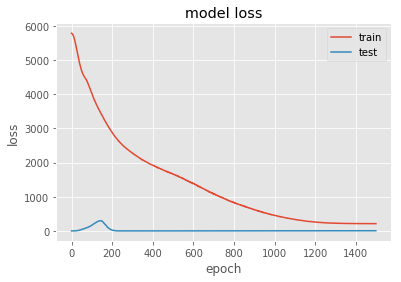

In [161]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

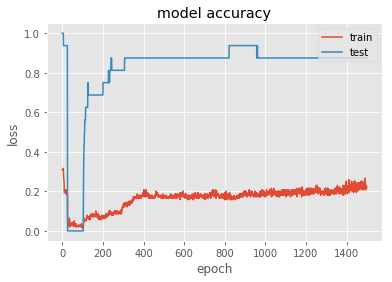

In [165]:
# summarize history for loss
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

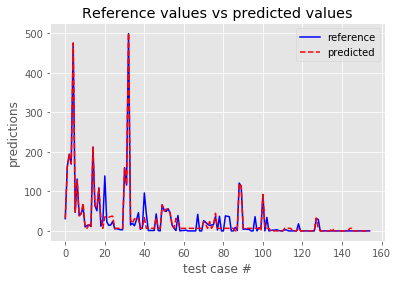

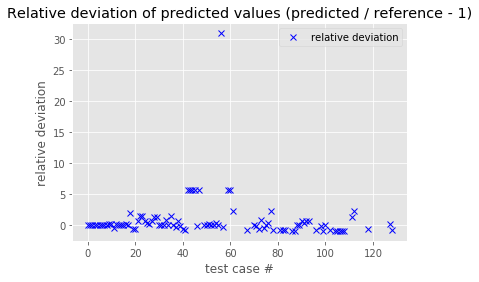

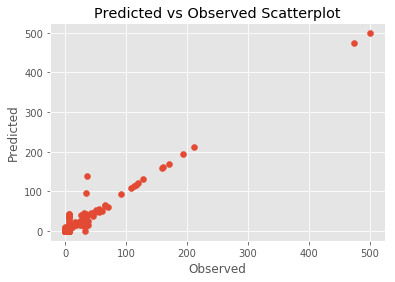

In [162]:
test_data_predicted = model.predict(X).flatten()
test_data_reference = y

relative_deviation = test_data_predicted/test_data_reference - 1.0

plt.figure()
plt.plot(range(len(test_data_reference)), test_data_reference, 'b-', label='reference')
plt.plot(range(len(test_data_predicted)), test_data_predicted, 'r--', label='predicted')
plt.xlabel('test case #')
plt.ylabel('predictions')
plt.title('Reference values vs predicted values')
plt.legend()

plt.figure()
plt.plot(range(len(test_data_predicted)), relative_deviation, 'bx', label='relative deviation')
plt.xlabel('test case #')
plt.ylabel('relative deviation')
plt.title('Relative deviation of predicted values (predicted / reference - 1)')
plt.legend()

plt.figure()
plt.scatter(test_data_predicted, test_data_reference)
plt.title("Predicted vs Observed Scatterplot")
plt.xlabel('Observed')
plt.ylabel('Predicted')

plt.show()

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True,show_layer_names=False,).create(prog='dot', format='svg'))

Using TensorFlow backend.


NameError: name 'model' is not defined

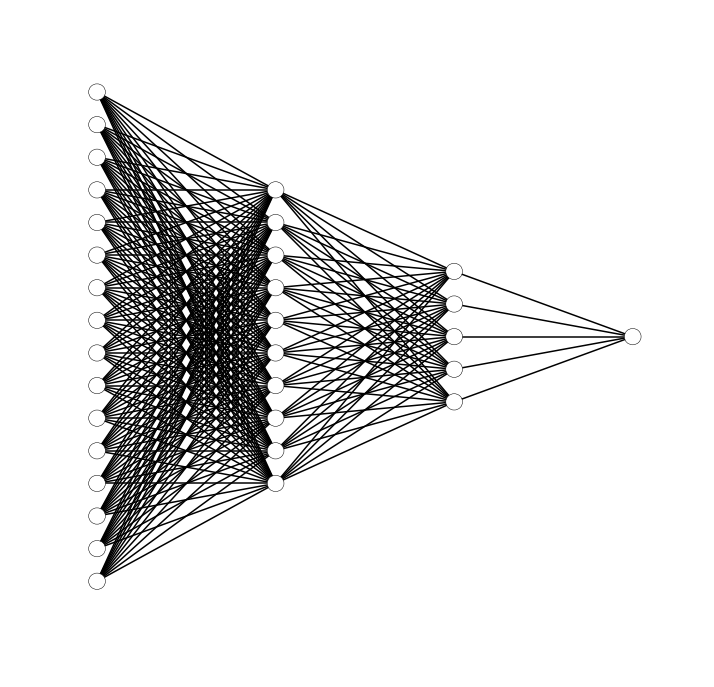

In [5]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
                
                
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [16, 10, 5, 1])
plt.show()

In [153]:
# # fix random seed for reproducibility
# seed = 7
# np.random.seed(seed)
# # evaluate model with standardized dataset
# estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=3000, batch_size=5, verbose=1)

In [157]:
# kfold = KFold(n_splits=20, random_state=seed)
# results = cross_val_score(estimator, X, y, cv=kfold)
# print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))
# estimator.fit(X,y)

In [158]:
# test_data_predicted = estimator.predict(X).flatten()
# test_data_reference = y

# plt.scatter(test_data_predicted, test_data_reference)
# plt.title("Predicted vs Observed Scatterplot")
# plt.xlabel('Observed')
# plt.ylabel('Predicted')

# plt.show()

In [20]:
# import pydot
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [21]:
# Y_hat = results.predict(X)
# plt.scatter(y, Y_hat)
# plt.show()